In [17]:
import json

data_file = '../game_data.json'


with open(data_file) as f:
    game_data = json.load(f)

In [26]:
import matplotlib.pyplot as plt

def create_histogram(data, title, xlabel, ylabel, color='tab:blue', figuresize=(10, 6)):
    labels = list(data.keys())
    values = list(data.values())

    n_bars = len(labels)
    figure_width = max(labels) - min(labels)

    bar_width = figure_width / (1.5 * n_bars)

    plt.figure(figsize=figuresize)
    plt.bar(labels, values, color=color, edgecolor='black', width=bar_width)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

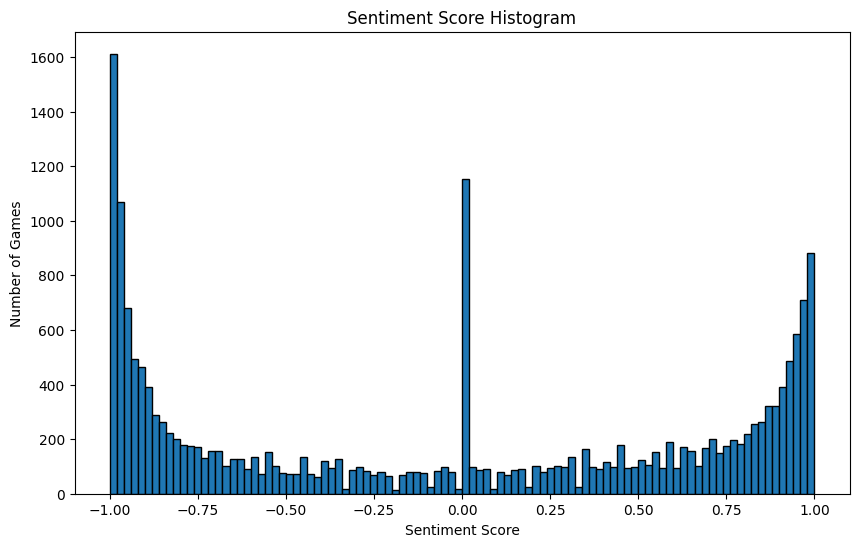

In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
# Function to get sentiment scores
def get_sentiment_scores(data, subsection = "gameplay"):
    sentiment_scores = {}
    for title, content in data.items():
        if subsection in content["text"]:
            # Assuming that 'text' holds the content you want to analyze
            sentiment = analyzer.polarity_scores(content['text'][subsection])
            sentiment_scores[title] = sentiment
    return sentiment_scores

# Function to create a histogram of sentiment scores
def create_sentiment_histogram(sentiment_data, sentiment='compound'):
    # Extracting the compound sentiment score for each game
    scores = [details[sentiment] for details in sentiment_data.values()]
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=100, color='tab:blue', edgecolor='black')
    plt.title('Sentiment Score Histogram')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Number of Games')
    plt.show()


In [41]:
from collections import Counter


unique_keys = Counter()
intersection = 0
for game, content in game_data.items():
        intersection += 1 if "plot" in content['text'].keys() and "gameplay" in content['text'].keys() else 0
        unique_keys.update(content['text'].keys())

# Display the unique keys
unique_keys


Counter({'introduction': 26720,
         'references': 25476,
         'external links': 21417,
         'reception': 20410,
         'gameplay': 19573,
         'development': 8872,
         'plot': 8065,
         'notes': 4868,
         'see also': 3109,
         'release': 2332,
         'legacy': 2093,
         'development and release': 1892,
         'characters': 1814,
         'story': 1425,
         'reviews': 1186,
         'sales': 1180,
         'synopsis': 987,
         'music': 918,
         'sequel': 811,
         'setting': 786,
         'critical reception': 766,
         'awards': 684,
         'soundtrack': 593,
         'accolades': 485,
         'multiplayer': 456,
         'history': 440,
         'ports': 435,
         'sequels': 400,
         'downloadable content': 395,
         'further reading': 362,
         'anime': 318,
         'features': 314,
         'overview': 302,
         'audio': 263,
         'production': 261,
         'manga': 261,
         'ga

In [52]:
sentiment_scores = {key: get_sentiment_scores(game_data, key) for key in unique_keys.keys()} 

KeyboardInterrupt: 